<img src="TP3_consigna.png" width="800px">

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

<h4>1. Obtener una detección de logo en cada imagen sin falsos positivos.</h4>

<function matplotlib.pyplot.show(close=None, block=None)>

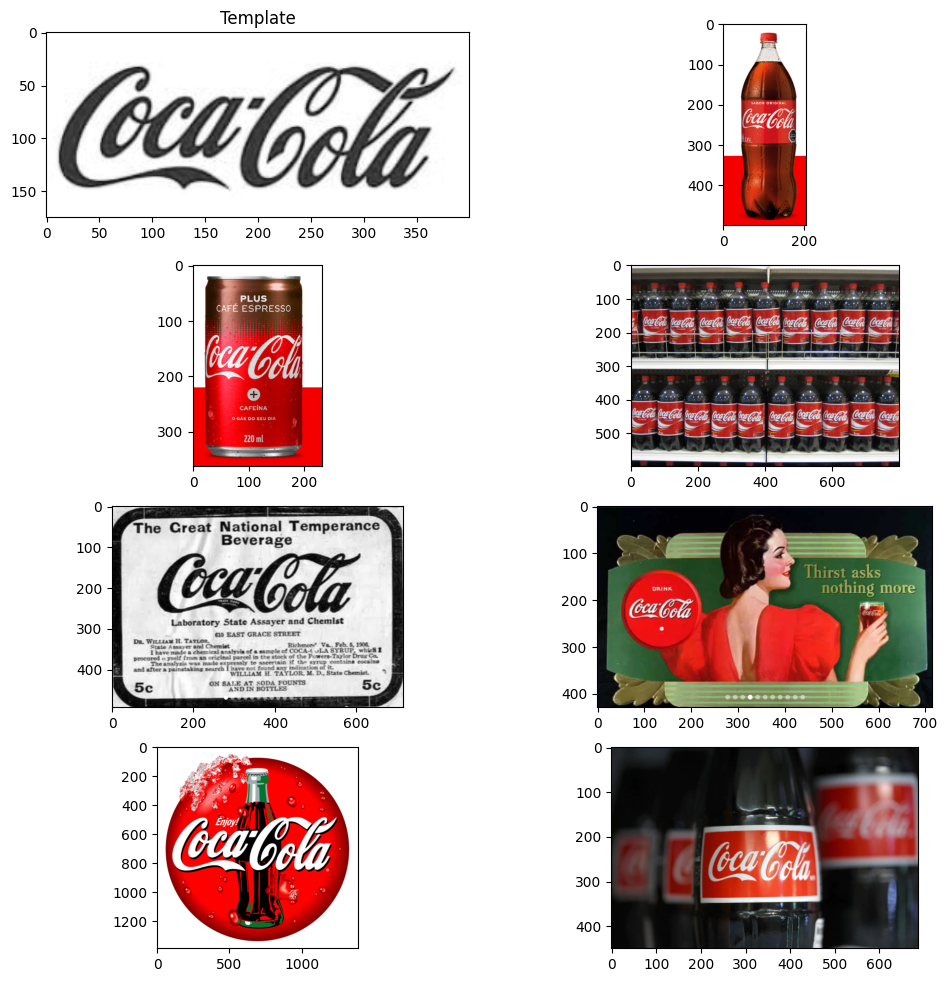

In [2]:
template = cv.imread('template/pattern.png',cv.IMREAD_GRAYSCALE)

images_gray =[]
images_gray.append(cv.imread('images/coca_logo_1.png',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/coca_logo_2.png',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/coca_multi.png',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/coca_retro_1.png',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/coca_retro_2.png',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/COCA-COLA-LOGO.jpg',cv.IMREAD_GRAYSCALE))
images_gray.append(cv.imread('images/logo_1.png',cv.IMREAD_GRAYSCALE))

images_RGB =[]
images_RGB.append(cv.cvtColor(cv.imread('images/coca_logo_1.png'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/coca_logo_2.png'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/coca_multi.png'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/coca_retro_1.png'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/coca_retro_2.png'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/COCA-COLA-LOGO.jpg'),cv.COLOR_BGR2RGB))
images_RGB.append(cv.cvtColor(cv.imread('images/logo_1.png'),cv.COLOR_BGR2RGB))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images_RGB[i], cmap='gray')
plt.show

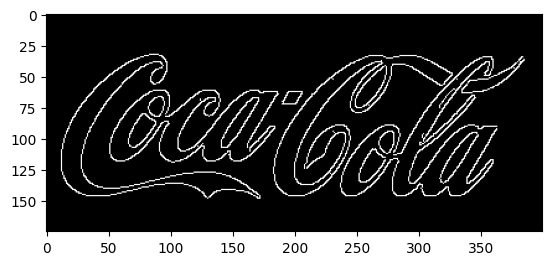

In [3]:
template_edges = cv.Canny(template, threshold1=5, threshold2=200)
plt.figure()
plt.imshow(template_edges,cmap = 'gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

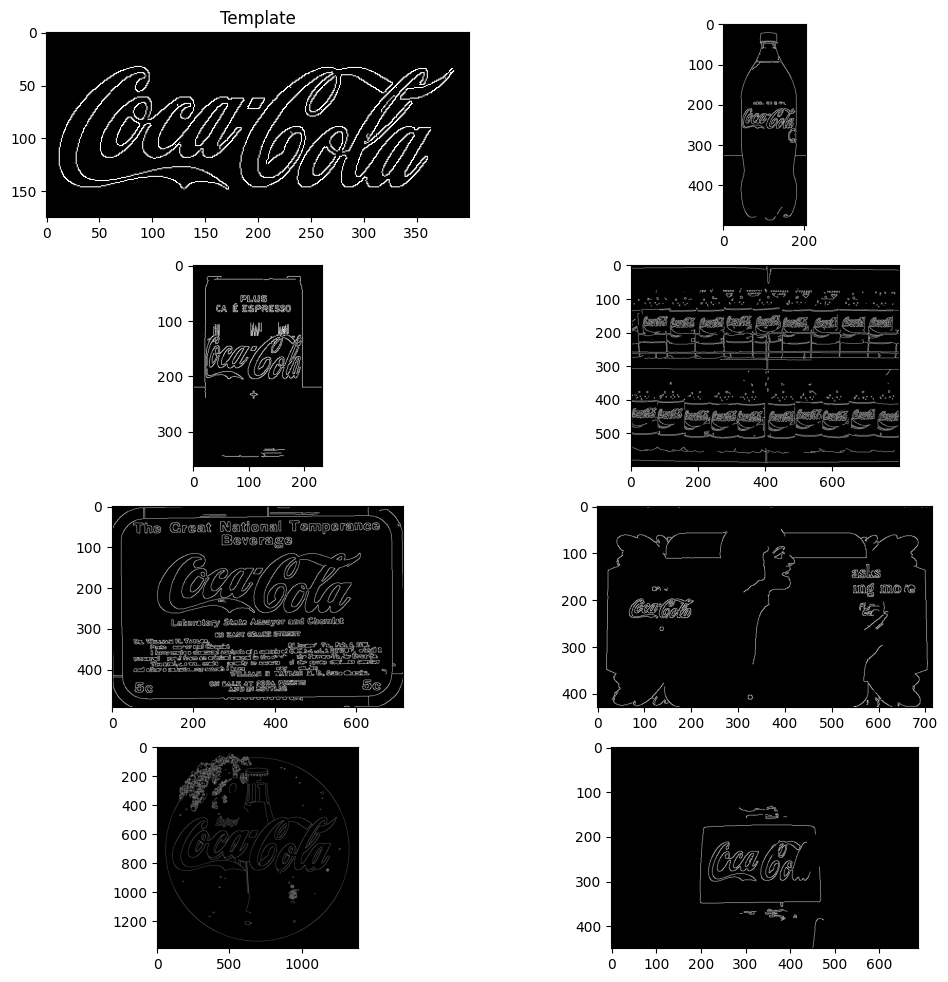

In [4]:
images_edges=[]
for img in images_gray:
    images_edges.append(cv.Canny(img, threshold1=200, threshold2=550))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template_edges, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images_edges[i], cmap='gray')
plt.show

In [5]:
def buscador_logos(template_edges,img_edges,graficar=True):
    w,h=template_edges.shape[::-1]
    wi, hi = img_edges.shape[::-1]
    scales = np.linspace(0.25, min(wi/w,hi/h), 20)
    resized_template = list()
    
    # generamos nuestra "piramide" de tamaños arbitrarios
    for scale in scales:
        resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))

    # Hago una copia de la imagen porque le dibujo rectángulos
    img_salida = img_edges.copy()

    max_val_final_1=0
    template_1=None
    top_left1=None
    resultado1=None

    max_val_final_2=0
    template_2=None
    top_left2=None
    resultado2=None

    for templ in resized_template:
        wt, ht = templ.shape[::-1]
        if (wt<wi) and (ht<hi):
            # Aplicamos la coincidencia de patrones
            #--------------------------------------
            res1 = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF)
            res2 = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF_NORMED)
            # Encontramos los valores máximos y mínimos
            _, max_val1, _, max_loc1 = cv.minMaxLoc(res1)
            _, max_val2, _, max_loc2 = cv.minMaxLoc(res2)
            if max_val1>max_val_final_1:
                max_val_final_1=max_val1
                template_1=templ
                top_left1=max_loc1
                bottom_right1 = (top_left1[0] + wt, top_left1[1] + ht)
                resultado1=res1

            if max_val2>max_val_final_2:
                max_val_final_2=max_val2
                template_2=templ
                top_left2=max_loc2
                resultado2=res2

    #print(max_val_final_1, max_val_final_2)
    
    # Vemos qué tanto el máximo encontrado ayuda a discriminar. Si es menor a un umbral, usamos el método alternativo.
    media1, desv_std1 = cv.meanStdDev(resultado1)
    max_vs_media_1=(max_val_final_1-media1)/desv_std1[0][0]

    if max_vs_media_1>4:
        resultado=resultado1
        top_left=top_left1
        template=template_1
    else:
        resultado=resultado2
        top_left=top_left2
        template=template_2
    
    #Graficamos el resultado
    if graficar:
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        wt, ht = template.shape[::-1]
        bottom_right = (top_left[0] + wt, top_left[1] + ht)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()

        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.suptitle(f'Tamaño template={template.shape})')
        plt.show()

    return template

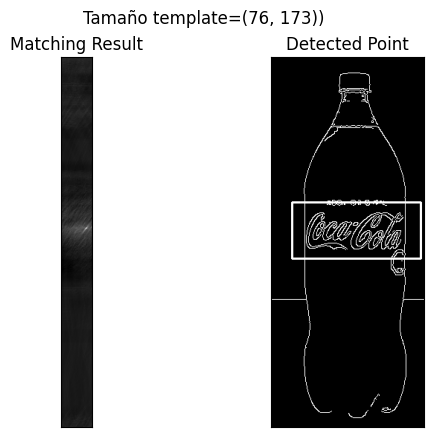

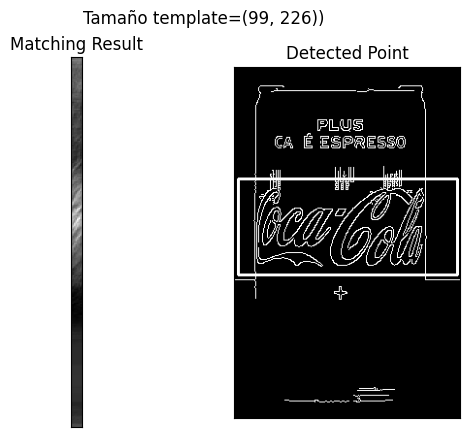

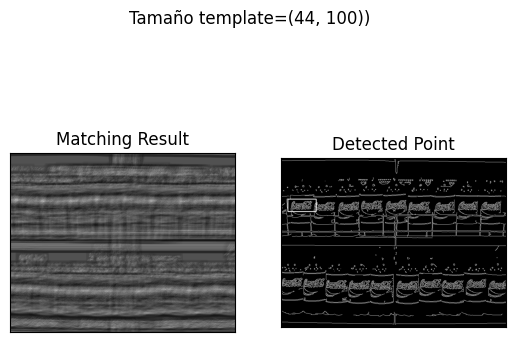

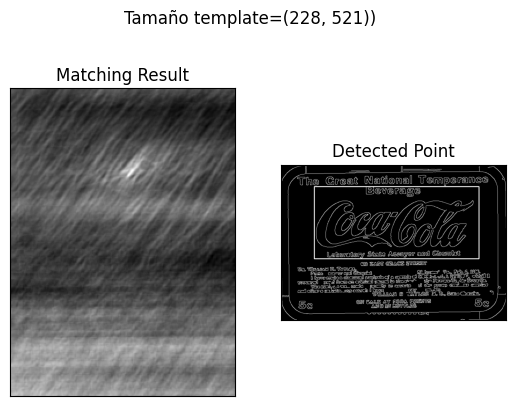

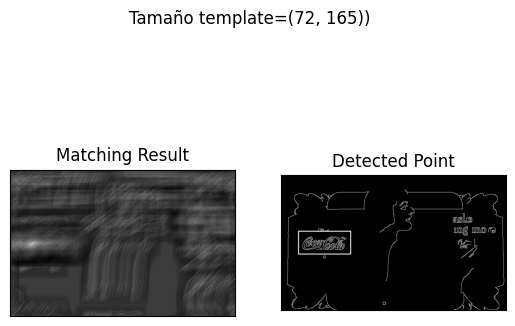

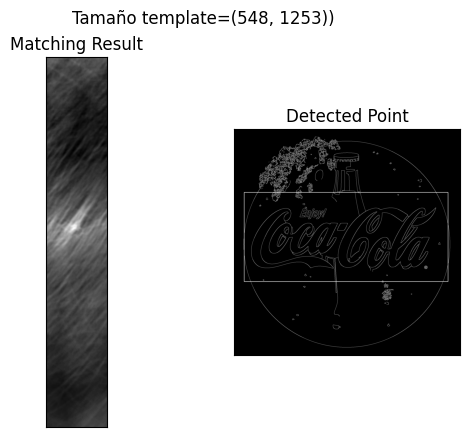

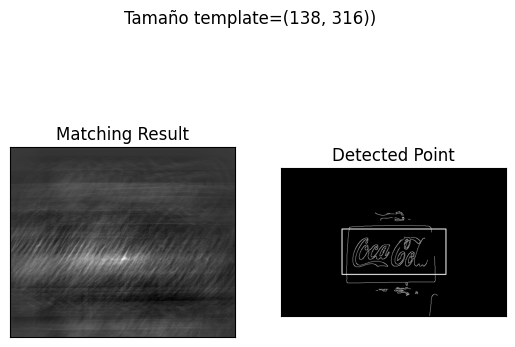

In [6]:
for img in images_edges:
 buscador_logos(template_edges,img)

<h4>2. Detección Múltiple</h>

Encontramos todos los resultados utilizando un threshold

In [7]:
img_multi_edges = images_edges[2]
# Aprovechamos el código del punto 1 para encontrar el tamaño apropiado de template
template = buscador_logos(template_edges,img_multi_edges,False)
img_salida = img_multi_edges.copy()
w, h = template.shape[::-1]
res = cv.matchTemplate(img_multi_edges,template,cv.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv.minMaxLoc(res)
print(max_val, 13/21.0)
# Fijamos un umbral de "coincidencia"
threshold = 0.13
loc = np.where( res >= threshold)


0.22962984442710876 0.6190476190476191


Utilizamos IoU y NMS para eliminar resultados repetidos alrededor de una misma área

In [8]:
# Extraer las cajas delimitadoras de las ubicaciones
boxes = [(x, y, x + w, y + h) for (x, y) in zip(*loc[::-1])]

def iou(box1, box2):
    # Calcular la intersección
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    
    # Calcular la unión
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    
    # Calcular IoU
    return inter_area / union_area if union_area != 0 else 0

def nms(boxes, iou_threshold):
    # Ordenar las cajas por la intensidad del resultado
    scores = [res[y, x] for (x, y, _, _) in boxes]  # Extrae el score de la esquina superior izquierda
    indices = sorted(range(len(boxes)), key=lambda i: scores[i], reverse=True)
    
    selected_indices = []
    while indices:
        current_index = indices.pop(0)
        current_box = boxes[current_index]
        selected_indices.append(current_index)
        
        # Suprimir cajas con IoU alto
        indices = [i for i in indices if iou(current_box, boxes[i]) < iou_threshold]
    
    return [boxes[i] for i in selected_indices]

# Aplicar NMS
iou_threshold = 0.5  # Puedes ajustar este umbral según tus necesidades
selected_boxes = nms(boxes, iou_threshold)

print("Cajas seleccionadas después de NMS:", selected_boxes)


Cajas seleccionadas después de NMS: [(24, 145, 124, 189), (103, 149, 203, 193), (438, 148, 538, 192), (271, 144, 371, 188), (558, 426, 658, 470), (481, 422, 581, 466), (66, 420, 166, 464), (228, 427, 328, 471), (142, 425, 242, 469), (623, 147, 723, 191), (400, 428, 500, 472), (301, 428, 401, 472), (195, 148, 295, 192), (652, 422, 752, 466), (539, 150, 639, 194), (698, 148, 798, 192)]


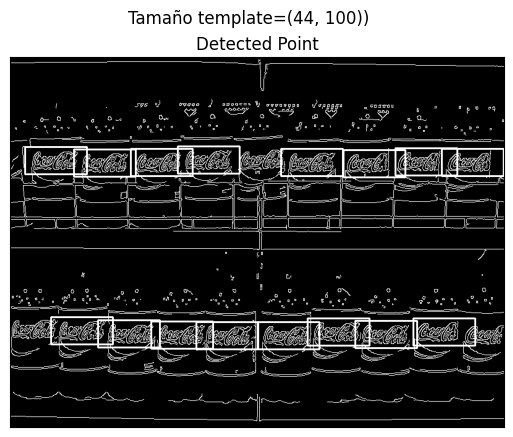

In [9]:
#Graficamos los logos encontrados
for pt in selected_boxes:
    cv.rectangle(img_salida, (pt[0],pt[1]), (pt[2],pt[3]), 255, 2)

plt.figure()
plt.imshow(img_salida,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.suptitle(f'Tamaño template={template.shape})')
plt.show()

<h4>3. Unificamos las funciones para todas las imágenes</h>

In [10]:
def buscador_logos_final(template_edges,img_edges,img_rgb,graficar=True, threshold_matching=0.13,threshold_nms=0.5):
    # Aprovechamos el código del punto 1 para encontrar el tamaño apropiado de template
    template = buscador_logos(template_edges,img_edges,False)
    img_salida = img_rgb.copy()
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img_edges,template,cv.TM_CCOEFF_NORMED)
    # Buscamos coincidencias con el umbral y el max_val para obtener siempre por lo menos una coincidencia
    _, max_val, _, _ = cv.minMaxLoc(res)
    loc = np.where( res >= min(max_val,threshold_matching))
    boxes = [(x, y, x + w, y + h) for (x, y) in zip(*loc[::-1])]
    selected_boxes = nms(boxes, threshold_nms)

    #Graficamos los logos enccontrados
    if graficar:
        for pt in selected_boxes:
            cv.rectangle(img_salida, (pt[0],pt[1]), (pt[2],pt[3]), (0,0,255), 2)

        plt.figure()
        plt.imshow(img_salida,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.suptitle(f'Tamaño template={template.shape})')
        plt.show()

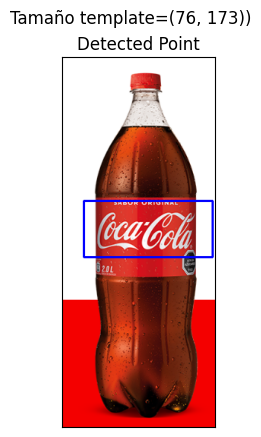

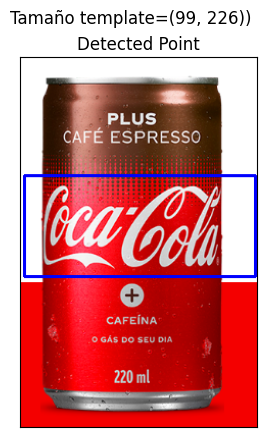

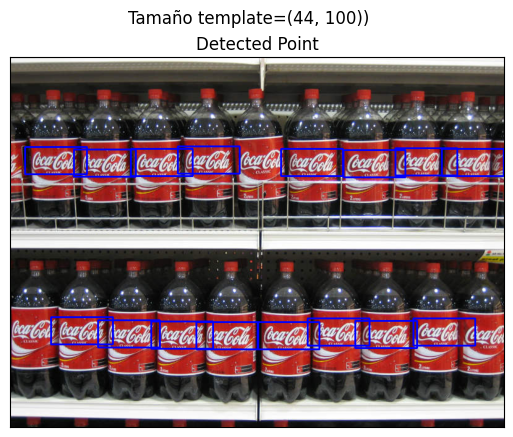

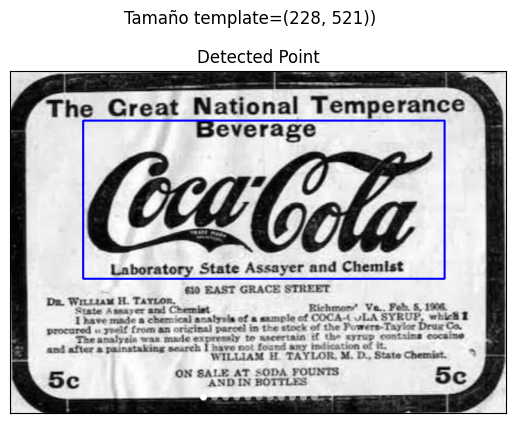

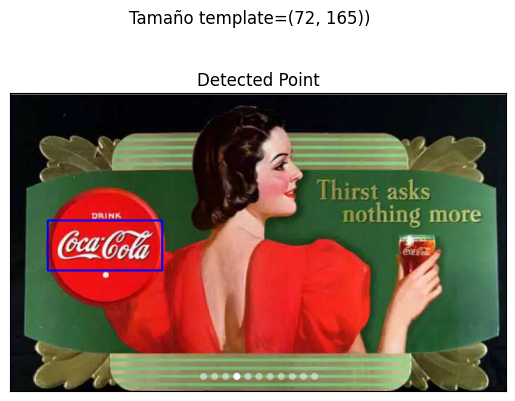

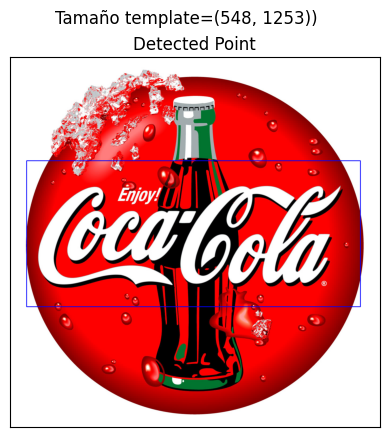

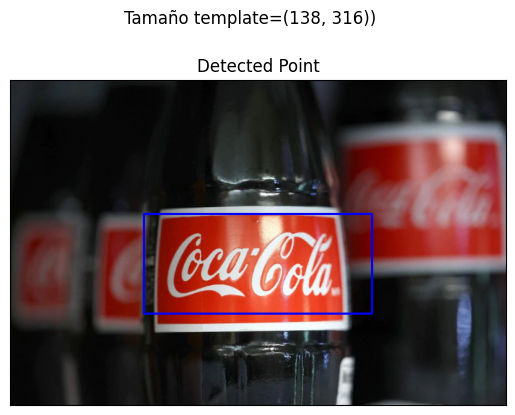

In [11]:
for i in np.arange(0,len(images_edges)):
    buscador_logos_final(template_edges,images_edges[i],images_RGB[i])